In [1]:
import numpy as np
import os
import h5py
import skimage.registration as skireg #used for image 
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import fourier_shift
from PIL import Image
import scipy.interpolate as interpolate
import pickle
from natsort import natsorted
import re
def nearest_power_of_2(x):
    if x <= 0:
        return 1
    exponent = np.ceil(np.log2(x))
    return int(np.power(2, exponent))

def padd_image(img):
    row, col = img.shape
    nearest_power = nearest_power_of_2(max(row, col))
    row_pad_top = int(np.floor((nearest_power - row) / 2))
    row_pad_bottom = nearest_power - row - row_pad_top
    col_pad_left = int(np.floor((nearest_power - col) / 2))
    col_pad_right = nearest_power - col - col_pad_left
    return np.pad(img, ((row_pad_top, row_pad_bottom), (col_pad_left, col_pad_right)), mode="constant", constant_values=0)

In [60]:
image_folder = r"D:\globus slate shared data Tankam Lab\inter_volume_registered\Timelapse_without_H2O2\registered_cropped_bottom"
image_address = os.path.join(image_folder, "scan2", "scan2.pickle")
image_address2 = os.path.join(image_folder, "scan3", "scan3.pickle")
# with h5py.File(os.path.join(image_address, f'{os.path.basename(image_address)}.h5'), "r") as h5f:
#     h5_data = h5f["volume"]
#     h5_slice = h5_data[:, 263, :]
#     temp_slice = np.array(h5_slice)
#     norm = cv2.normalize(temp_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint16)
#     norm = cv2.convertScaleAbs(norm, 1.2, 2)
#     padd_norm = padd_image(norm)

# with h5py.File(os.path.join(image_address2, f'{os.path.basename(image_address2)}.h5'), "r") as h5f:
#     h5_data = h5f["volume"]
#     h5_slice = h5_data[:, 263, :]
#     temp_slice = np.array(h5_slice)
#     norm2 = cv2.normalize(temp_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint16)
#     norm2 = cv2.convertScaleAbs(norm2, 1.2, 2)
#     padd_norm2 = padd_image(norm2)
slice_index = 24
with open(image_address, "rb") as h5f:
    h5_data = pickle.load(h5f)
    h5_slice = h5_data[:, slice_index, :]
    temp_slice = np.array(h5_slice)
    norm = cv2.normalize(temp_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint16)
    norm = cv2.convertScaleAbs(norm, 1.2, 2)
    padd_norm = padd_image(norm)

C:\Users\liu473\AppData\Local\Temp\23\ipykernel_22824\2128575954.py:21: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  h5_data = pickle.load(h5f)


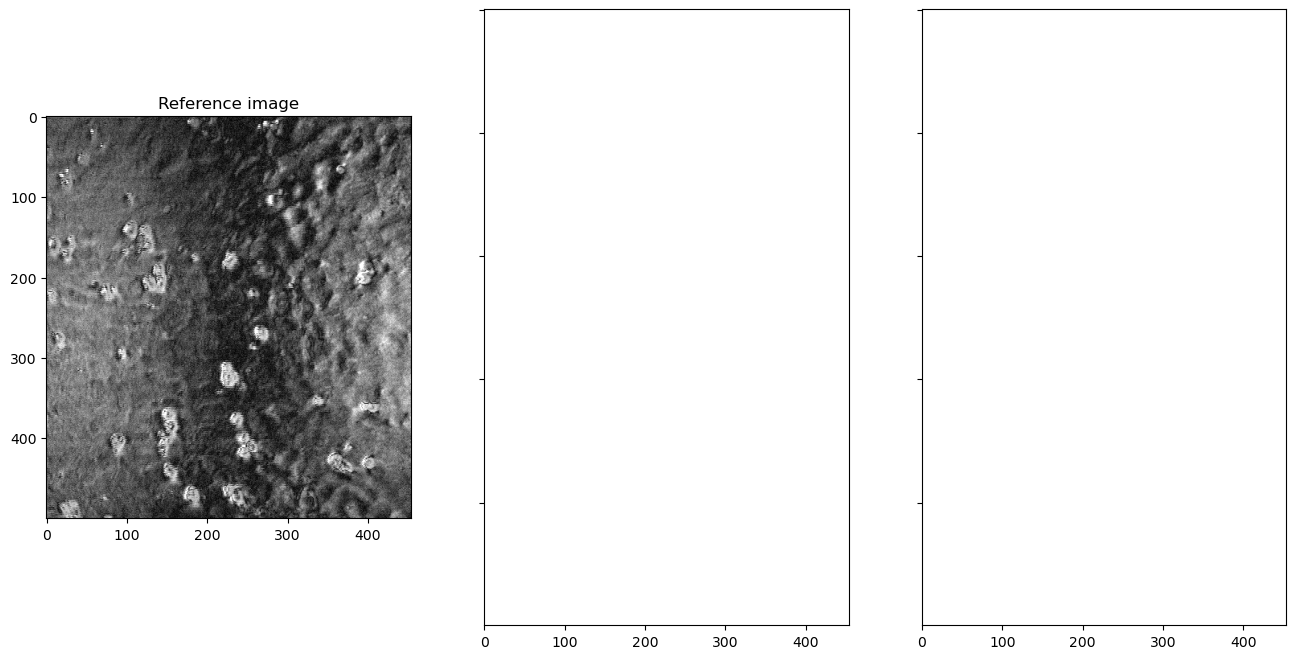

In [61]:
# norm[40, :] = 255
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (16, 8))
ax1.imshow(norm, cmap="gray")
# ax1.set_axis_off()
ax1.set_title("Reference image")

# ax2.imshow(padd_norm2, cmap="gray")
# # ax2.set_axis_off()
# ax2.set_title("Target image")

# ax3.imshow(padd_norm, cmap="gray")
# ax3.imshow(padd_norm2, cmap="gray", alpha=0.6)
# ax3.set_title("combined")
plt.show()

In [4]:
a, b = norm.shape
a

500

In [69]:
image = []
scan_list = [f for f in natsorted(os.listdir(image_folder)) if re.match('scan[0-9]+', f)]
np_image_array = np.zeros((len(scan_list), norm.shape[0], norm.shape[1]))#store image

##f5h file
# for j in range(len(scan_list)):
#     image_address2 = os.path.join(image_folder, f'scan{j + 1}', f'scan{j + 1}.pickle')
#     with h5py.File(image_address2, "rb") as h5f:
#         h5_data = h5f["volume"]
#         h5_slice = h5_data[:, 263, :]
#         temp_slice = np.array(h5_slice)
#         norm2 = cv2.normalize(temp_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint16)
#         norm2 = cv2.convertScaleAbs(norm2, 1.2, 2)
#     correct_frame = np.full(norm.shape, np.nan)#used to store corrected en-face image
#     index_list = list(range(0, norm.shape[0], 5))
#     for i in range(len(index_list) - 1):
#         strip = norm2[index_list[i]:index_list[i + 1], :].copy()
#         zero_padd = np.full(norm.shape, 0)
#         zero_padd[index_list[i]:index_list[i + 1], :] = strip
#         padd_zero_pad = padd_image(zero_padd)
#         shift, error, diffphase = skireg.phase_cross_correlation(padd_norm, padd_zero_pad)
#         y_shift = np.uint(shift[0])
#         if index_list[i] + shift[0] < 0 or index_list[i + 1] + shift[0] > norm.shape[0]:
#             correct_frame[index_list[i]:index_list[i + 1], :] = norm[index_list[i]:index_list[i + 1], :]
#         elif y_shift <= 10:
#             y_shift = np.uint(shift[0])
#             correct_frame[(index_list[i] + y_shift) : (index_list[i + 1] + y_shift), :] = strip

#     # image.append(Image.fromarray(correct_frame.astype(np.uint8)))
#     np_image_array[j, :, :] = correct_frame

for j in range(len(scan_list)):
    image_address2 = os.path.join(image_folder, f'scan{j + 1}', f'scan{j + 1}.pickle')
    with open(image_address2, "rb") as h5f:
        h5_data = pickle.load(h5f)
        h5_slice = h5_data[:, slice_index, :]
        temp_slice = np.array(h5_slice)
        norm2 = cv2.normalize(temp_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint16)
        norm2 = cv2.convertScaleAbs(norm2, 1.2, 2)
    correct_frame = np.full(norm.shape, np.nan)#used to store corrected en-face image
    index_list = list(range(0, norm.shape[0], 10))
    for i in range(len(index_list) - 1):
        strip = norm2[index_list[i]:index_list[i + 1], :].copy()
        zero_padd = np.full(norm.shape, 0)
        zero_padd[index_list[i]:index_list[i + 1], :] = strip
        padd_zero_pad = padd_image(zero_padd)
        shift, error, diffphase = skireg.phase_cross_correlation(padd_norm, padd_zero_pad)
        y_shift = np.uint(shift[0])
        x_shift = np.uint(shift[1])
        row_vector = np.arange(norm.shape[1]) + x_shift
        rec_vector = np.broadcast_to(row_vector, strip.shape)
        row_shift = np.logical_and(rec_vector >= 0, rec_vector <= norm.shape[1])
        row_shift_binary = row_shift.astype(int)
        row_shift_binary = np.array(row_shift_binary, dtype=float)
        row_shift_binary[row_shift_binary == 0] = np.nan#convert 0 to nan
        if index_list[i] + shift[0] < 0 or index_list[i + 1] + shift[0] > norm.shape[0]:
            correct_frame[index_list[i]:index_list[i + 1], :] = norm[index_list[i]:index_list[i + 1], :]
        elif y_shift <= 20:
            y_shift = np.uint(shift[0])
            correct_frame[(index_list[i] + y_shift) : (index_list[i + 1] + y_shift), :] = strip * row_shift_binary

    # image.append(Image.fromarray(correct_frame.astype(np.uint8)))
    np_image_array[j, :, :] = correct_frame
    

C:\Users\liu473\AppData\Local\Temp\23\ipykernel_22824\3702957935.py:35: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  h5_data = pickle.load(h5f)


In [20]:
1 * np.nan

nan

In [70]:
#interpolate all nan value in the dataset
gridx, gridy, gridz = np.mgrid[0:len(scan_list), 0:norm.shape[0], 0:norm.shape[1]]
frame_not_nan = np.argwhere(~np.isnan(np_image_array))#coordinate of all real value
grid_inter = interpolate.griddata((frame_not_nan[:, 0], frame_not_nan[:, 1], frame_not_nan[:, 2]), np_image_array[frame_not_nan[:, 0], frame_not_nan[:, 1], frame_not_nan[:, 2]], (gridx, gridy, gridz), method="nearest")
# image[0].save(os.path.join(address, "corrected_img.gif"), save_all = True, append_images=image[1:], optimize=False, duration=1, loop=0)

In [71]:
#generate gif images
for j in range(len(scan_list)):
    gif_frame = grid_inter[j, :, :]
    image.append(Image.fromarray(gif_frame.astype(np.uint8)))
image[0].save(os.path.join(image_folder, "corrected_img.gif"), save_all = True, append_images=image[1:], optimize=False, duration=1, loop=0)

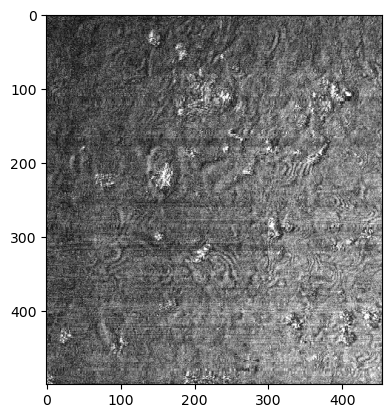

In [52]:
# mean_image = np.max(image, axis=0)
plt.imshow(grid_inter[18, :, :], cmap="gray")